In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Loading Data

In [2]:
df_HAR_test = pd.read_csv("classification_datasets/4_human_activity_recognition/HAR_test.csv")
df_HAR_train = pd.read_csv("classification_datasets/4_human_activity_recognition/HAR_train.csv")

In [3]:
print(np.unique(df_HAR_train["subject"]))
print(np.unique(df_HAR_test["subject"]))
print(np.unique(df_HAR_train["Activity"]))

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
[ 2  4  9 10 12 13 18 20 24]
['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [4]:
df_HAR_train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# EDA

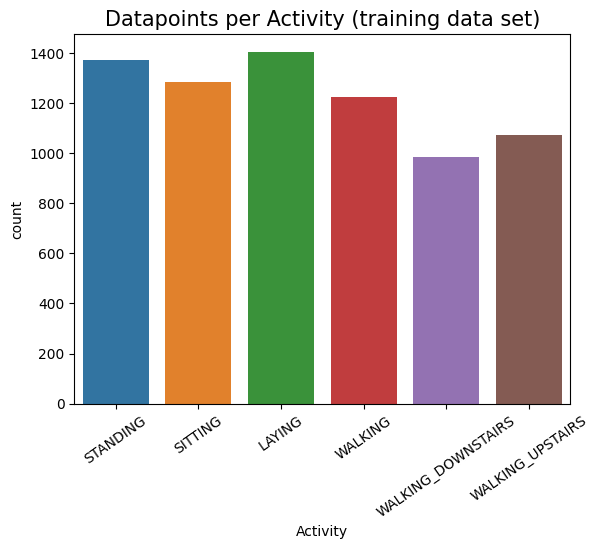

In [5]:
plt.title('Datapoints per Activity (training data set)', fontsize=15)
sns.countplot(x=df_HAR_train['Activity'], hue=df_HAR_train['Activity'])
plt.xticks(rotation=35)
plt.show()

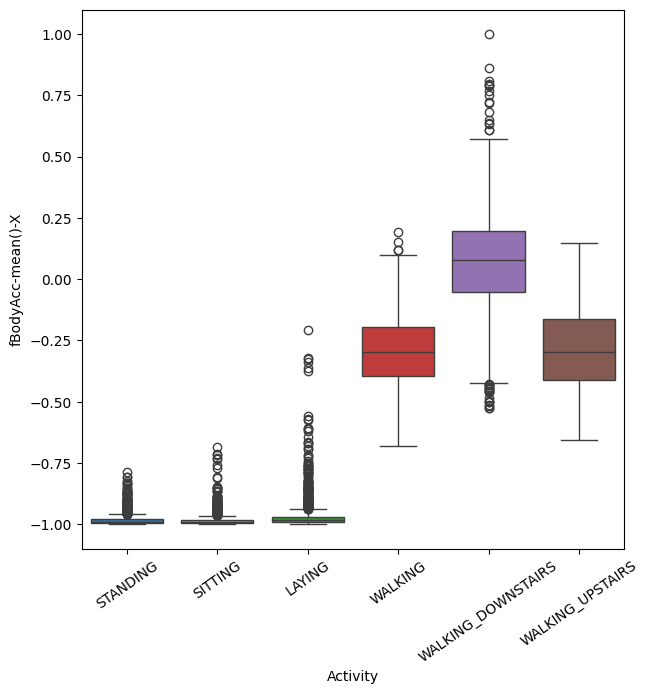

In [6]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='fBodyAcc-mean()-X', data=df_HAR_train, hue='Activity')
plt.ylabel('fBodyAcc-mean()-X')
plt.xticks(rotation=35)
plt.show()

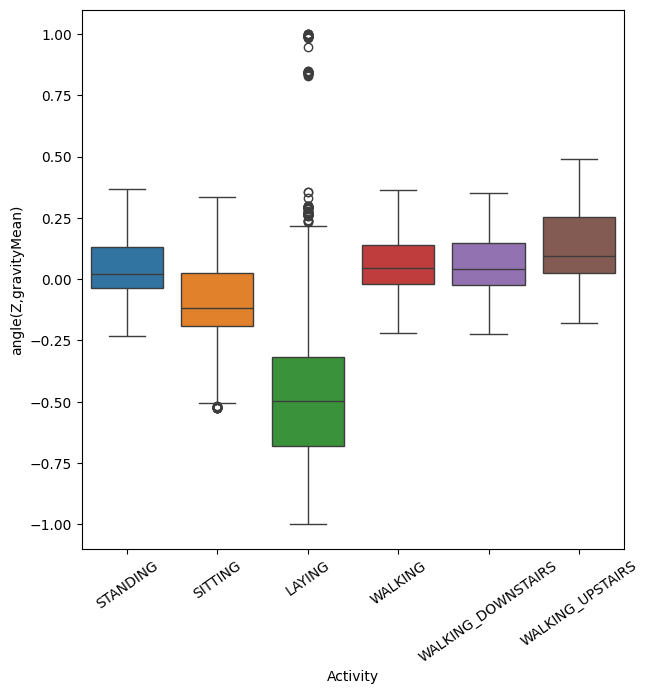

In [7]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='angle(Z,gravityMean)', data=df_HAR_train, hue='Activity')
plt.ylabel('angle(Z,gravityMean)')
plt.xticks(rotation=35)
plt.show()

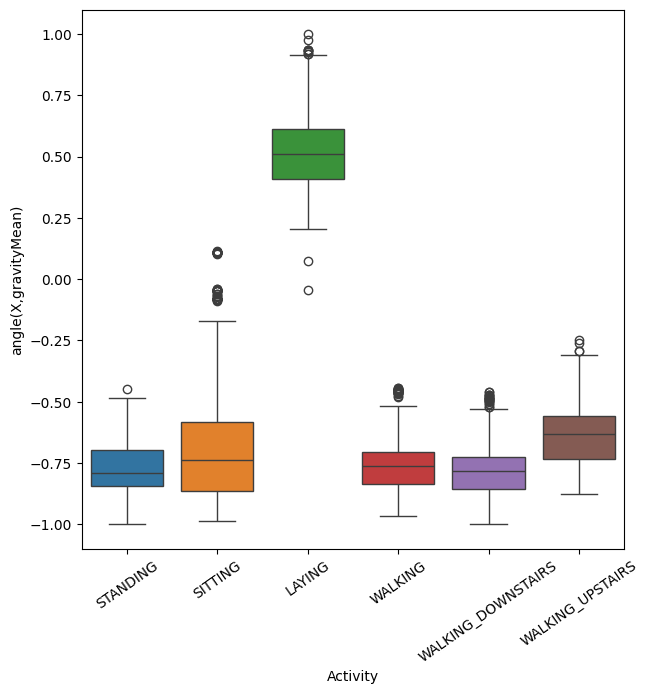

In [8]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df_HAR_train, hue='Activity')
plt.ylabel('angle(X,gravityMean)')
plt.xticks(rotation=35)
plt.show()

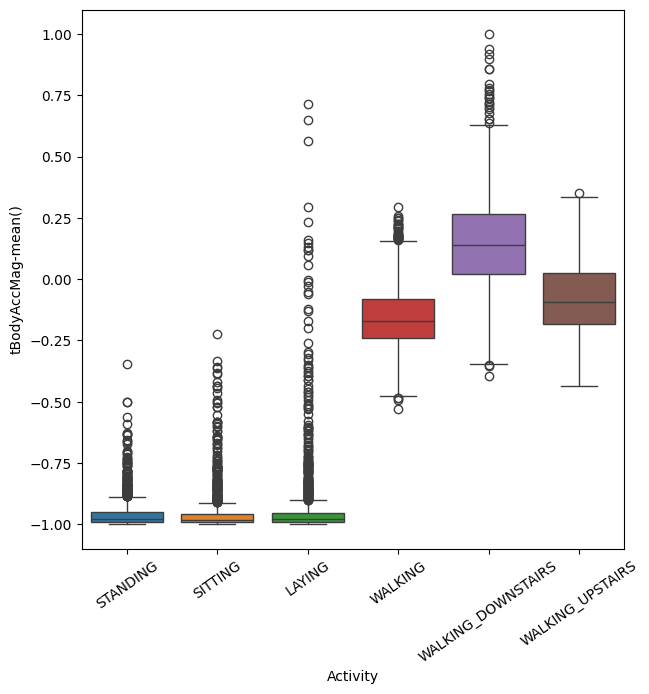

In [9]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=df_HAR_train, hue='Activity')
plt.ylabel('tBodyAccMag-mean()')
plt.xticks(rotation=35)
plt.show()

# Matrix X and Y, Data Scaling

In [10]:
X_train = df_HAR_train.drop(columns=["subject", "Activity"]).to_numpy()
Y_train = df_HAR_train["Activity"].to_numpy()
X_test = df_HAR_test.drop(columns=["subject", "Activity"]).to_numpy()
Y_test = df_HAR_test["Activity"].to_numpy()

print(f"X_train_shape={X_train.shape}\tY_train_shape={Y_train.shape}")
print(f"X_test_shape={X_test.shape}\tY_test_shape={Y_test.shape}")

X_train_shape=(7352, 561)	Y_train_shape=(7352,)
X_test_shape=(2947, 561)	Y_test_shape=(2947,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# t-SNE Visualization

In [12]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_scaled_train, Y_train)

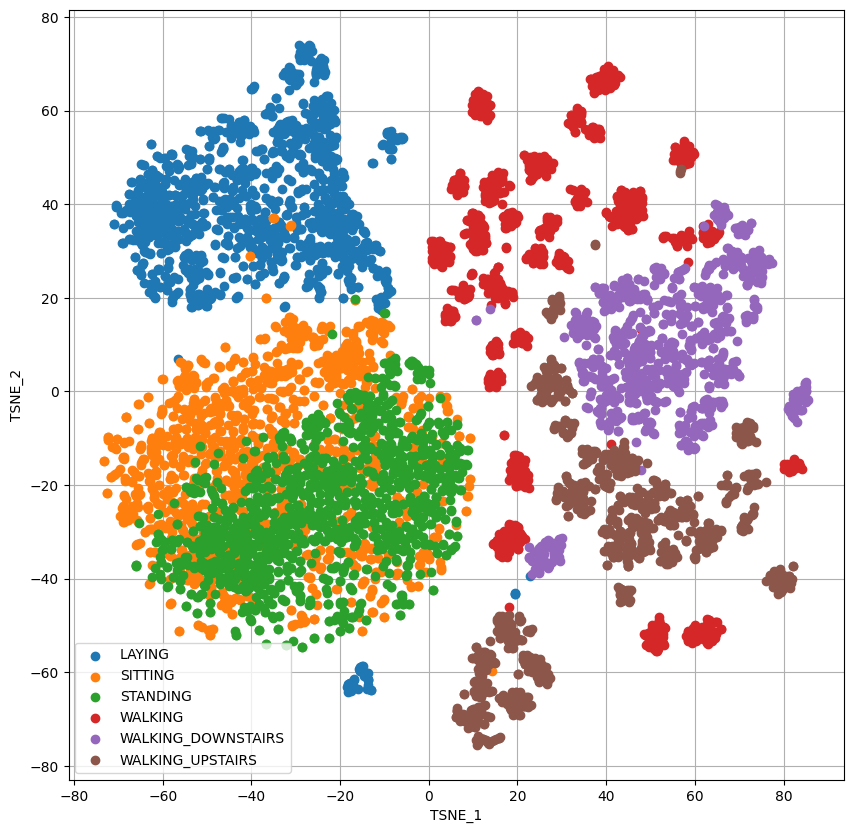

In [13]:
fig, ax = plt.subplots()

for label in np.unique(Y_train):

  mask = (Y_train == label)
  ax.scatter(X_train_tsne[:, 0][mask], X_train_tsne[:, 1][mask], label=label, zorder=3)

ax.legend()
ax.grid(zorder=0)

ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")

fig.set_size_inches((10, 10))

# LDA Dimensional Reduction

In [14]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_scaled_train, Y_train)

X_lda_train = model_LDA.transform(X_scaled_train)
print(X_lda_train.shape)

df_LDA_train = pd.DataFrame(X_lda_train, columns=[f"feat_LDA_{i}" for i in range(1, 6)])
df_LDA_train["Activity"] = Y_train

(7352, 5)


In [15]:
df_LDA_train

,feat_LDA_1,feat_LDA_2,feat_LDA_3,feat_LDA_4,feat_LDA_5,Activity
0,-10.131303,-8.600555,0.521162,1.090378,4.051475,STANDING
1,-9.774950,-6.967300,0.392349,-0.467446,2.314259,STANDING
2,-9.767446,-7.145707,-0.195444,0.005705,3.795791,STANDING
3,-9.745219,-8.133894,0.168621,-0.064691,1.886819,STANDING
4,-8.886116,-7.619552,0.569457,-0.345804,2.563435,STANDING
...,...,...,...,...,...,...
7347,14.990550,1.496184,1.722095,-4.996508,-0.080832,WALKING_UPSTAIRS
7348,13.880743,1.098592,-0.145077,-5.674810,-0.216867,WALKING_UPSTAIRS
7349,14.363545,0.965910,0.187389,-6.604889,-1.077141,WALKING_UPSTAIRS
7350,14.592779,1.905171,-0.237764,-7.295756,-0.711986,WALKING_UPSTAIRS


In [16]:
X_lda_test = model_LDA.transform(X_scaled_test)

# Box Plots of New Features

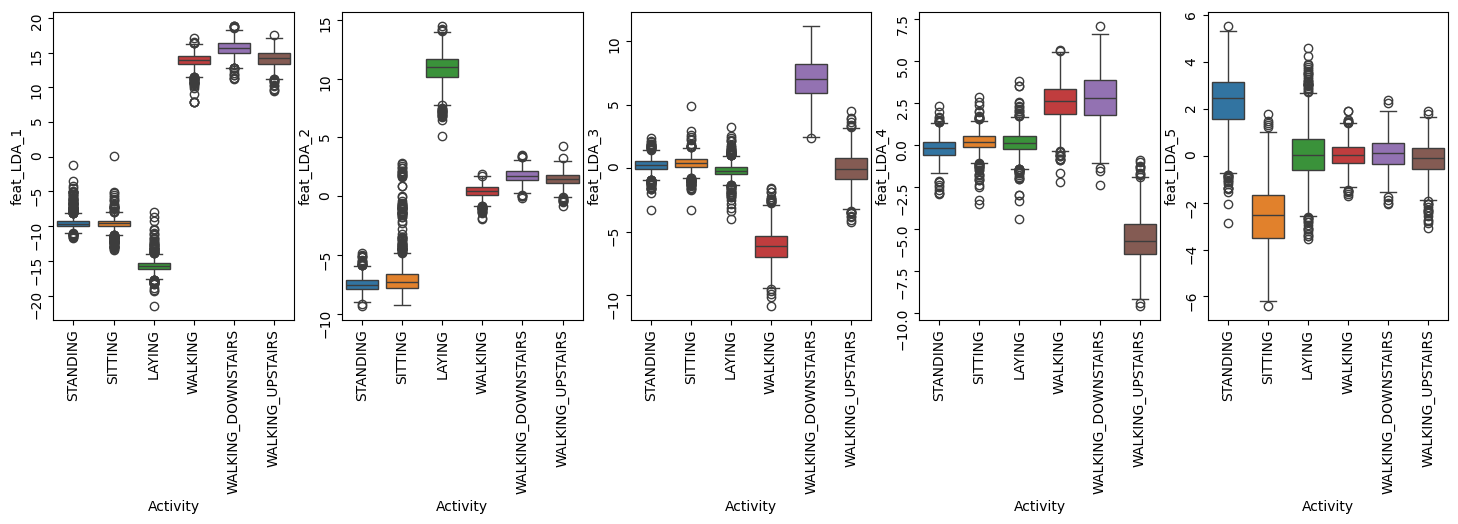

In [17]:
fig, ax = plt.subplots(1, 5)
for counter, col in enumerate(df_LDA_train.columns[:-1]):
  j = counter % 5
  sns.boxplot(ax=ax[j], data=df_LDA_train, x="Activity", y=col, hue="Activity")
  ax[j].tick_params(labelrotation=90)
fig.set_size_inches(18, 4)

# Logistic Regression

In [18]:
model_logreg = LogisticRegression()
model_logreg.fit(X_lda_train, Y_train)

LogisticRegression()

In [19]:
Y_pred = model_logreg.predict(X_lda_test)
print(Y_pred)
print(Y_pred.shape)
print(Y_test)
print(Y_test.shape)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']
(2947,)
['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']
(2947,)


In [20]:
print(f"accuracy={np.round(accuracy_score(Y_test, Y_pred), 4)}")
print(f"precission={np.round(precision_score(Y_test, Y_pred, average="macro"), 4)}")
print(f"recall={np.round(recall_score(Y_test, Y_pred, average="macro"), 4)}")
print(f"F1={np.round(f1_score(Y_test, Y_pred, average="macro"), 4)}")

accuracy=0.965
precission=0.9673
recall=0.965
F1=0.9656


# KNN

In [21]:
model_KNN = KNeighborsClassifier()
scores = cross_val_score(model_KNN, X_lda_train, Y_train, cv=5, scoring="accuracy")
print(scores)
print(f"acc={scores.mean().round(3)}+-{scores.std().round(3)}")

[0.97552685 0.98640381 0.9755102  0.98979592 0.99047619]
acc=0.984+-0.007


## Hyperparameter Tuning

In [23]:
best_params = dict()
best_params["f1_mean"] = 0

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, 21, 2):
  for metric_type in ['euclidean', 'manhattan', 'cosine']:

    model_KNN = KNeighborsClassifier(n_neighbors=k, metric=metric_type)
    scores = cross_val_score(model_KNN, X_lda_train, Y_train, cv=cv, scoring="f1_macro")

    print(f"{k} \t {metric_type} \t {scores.mean().round(3)}")

    if scores.mean() > best_params["f1_mean"]:
      best_params["f1_mean"] = scores.mean()
      best_params["f1_std"] = scores.std()
      best_params["n_neighbors"] = k
      best_params["metric_type"] = metric_type

print(best_params)

1 	 euclidean 	 0.983
1 	 manhattan 	 0.981
1 	 cosine 	 0.982
3 	 euclidean 	 0.986
3 	 manhattan 	 0.986
3 	 cosine 	 0.986
5 	 euclidean 	 0.987
5 	 manhattan 	 0.988
5 	 cosine 	 0.987
7 	 euclidean 	 0.988
7 	 manhattan 	 0.988
7 	 cosine 	 0.987
9 	 euclidean 	 0.988
9 	 manhattan 	 0.988
9 	 cosine 	 0.987
11 	 euclidean 	 0.988
11 	 manhattan 	 0.988
11 	 cosine 	 0.987
13 	 euclidean 	 0.987
13 	 manhattan 	 0.988
13 	 cosine 	 0.988
15 	 euclidean 	 0.988
15 	 manhattan 	 0.988
15 	 cosine 	 0.988
17 	 euclidean 	 0.988
17 	 manhattan 	 0.988
17 	 cosine 	 0.988
19 	 euclidean 	 0.988
19 	 manhattan 	 0.989
19 	 cosine 	 0.988
{'f1_mean': 0.9886907998264659, 'f1_std': 0.002403140357044381, 'n_neighbors': 19, 'metric_type': 'manhattan'}


In [25]:
best_params = dict()
best_params["f1_mean"] = 0

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in range(6, 10):
  for metric_type in ['euclidean', 'manhattan', 'cosine']:

    model_KNN = KNeighborsClassifier(n_neighbors=k, metric=metric_type)
    scores = cross_val_score(model_KNN, X_lda_train, Y_train, cv=cv, scoring="f1_macro")

    print(f"{k} \t {metric_type} \t {scores.mean().round(3)}")

    if scores.mean() > best_params["f1_mean"]:
      best_params["f1_mean"] = scores.mean()
      best_params["f1_std"] = scores.std()
      best_params["n_neighbors"] = k
      best_params["metric_type"] = metric_type

print(best_params)

6 	 euclidean 	 0.987
6 	 manhattan 	 0.988
6 	 cosine 	 0.986
7 	 euclidean 	 0.988
7 	 manhattan 	 0.988
7 	 cosine 	 0.987
8 	 euclidean 	 0.988
8 	 manhattan 	 0.987
8 	 cosine 	 0.987
9 	 euclidean 	 0.988
9 	 manhattan 	 0.988
9 	 cosine 	 0.987
{'f1_mean': 0.9880859993402611, 'f1_std': 0.00241074851956107, 'n_neighbors': 8, 'metric_type': 'euclidean'}


# Decision Tree Calssifier

In [26]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for max_depth in range(1, 20):

    model_DT = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model_DT, X_lda_train, Y_train, cv=cv, scoring="f1_macro")
    print(f"max_depth={max_depth}\tf1={scores.mean().round(4)}")

max_depth=1	f1=0.2292
max_depth=2	f1=0.3707
max_depth=3	f1=0.7631
max_depth=4	f1=0.9825
max_depth=5	f1=0.9847
max_depth=6	f1=0.985
max_depth=7	f1=0.9832
max_depth=8	f1=0.9824
max_depth=9	f1=0.9806
max_depth=10	f1=0.9794
max_depth=11	f1=0.9789
max_depth=12	f1=0.9791
max_depth=13	f1=0.9797
max_depth=14	f1=0.9792
max_depth=15	f1=0.9795
max_depth=16	f1=0.9795
max_depth=17	f1=0.9795
max_depth=18	f1=0.9795
max_depth=19	f1=0.9795


## Visualization

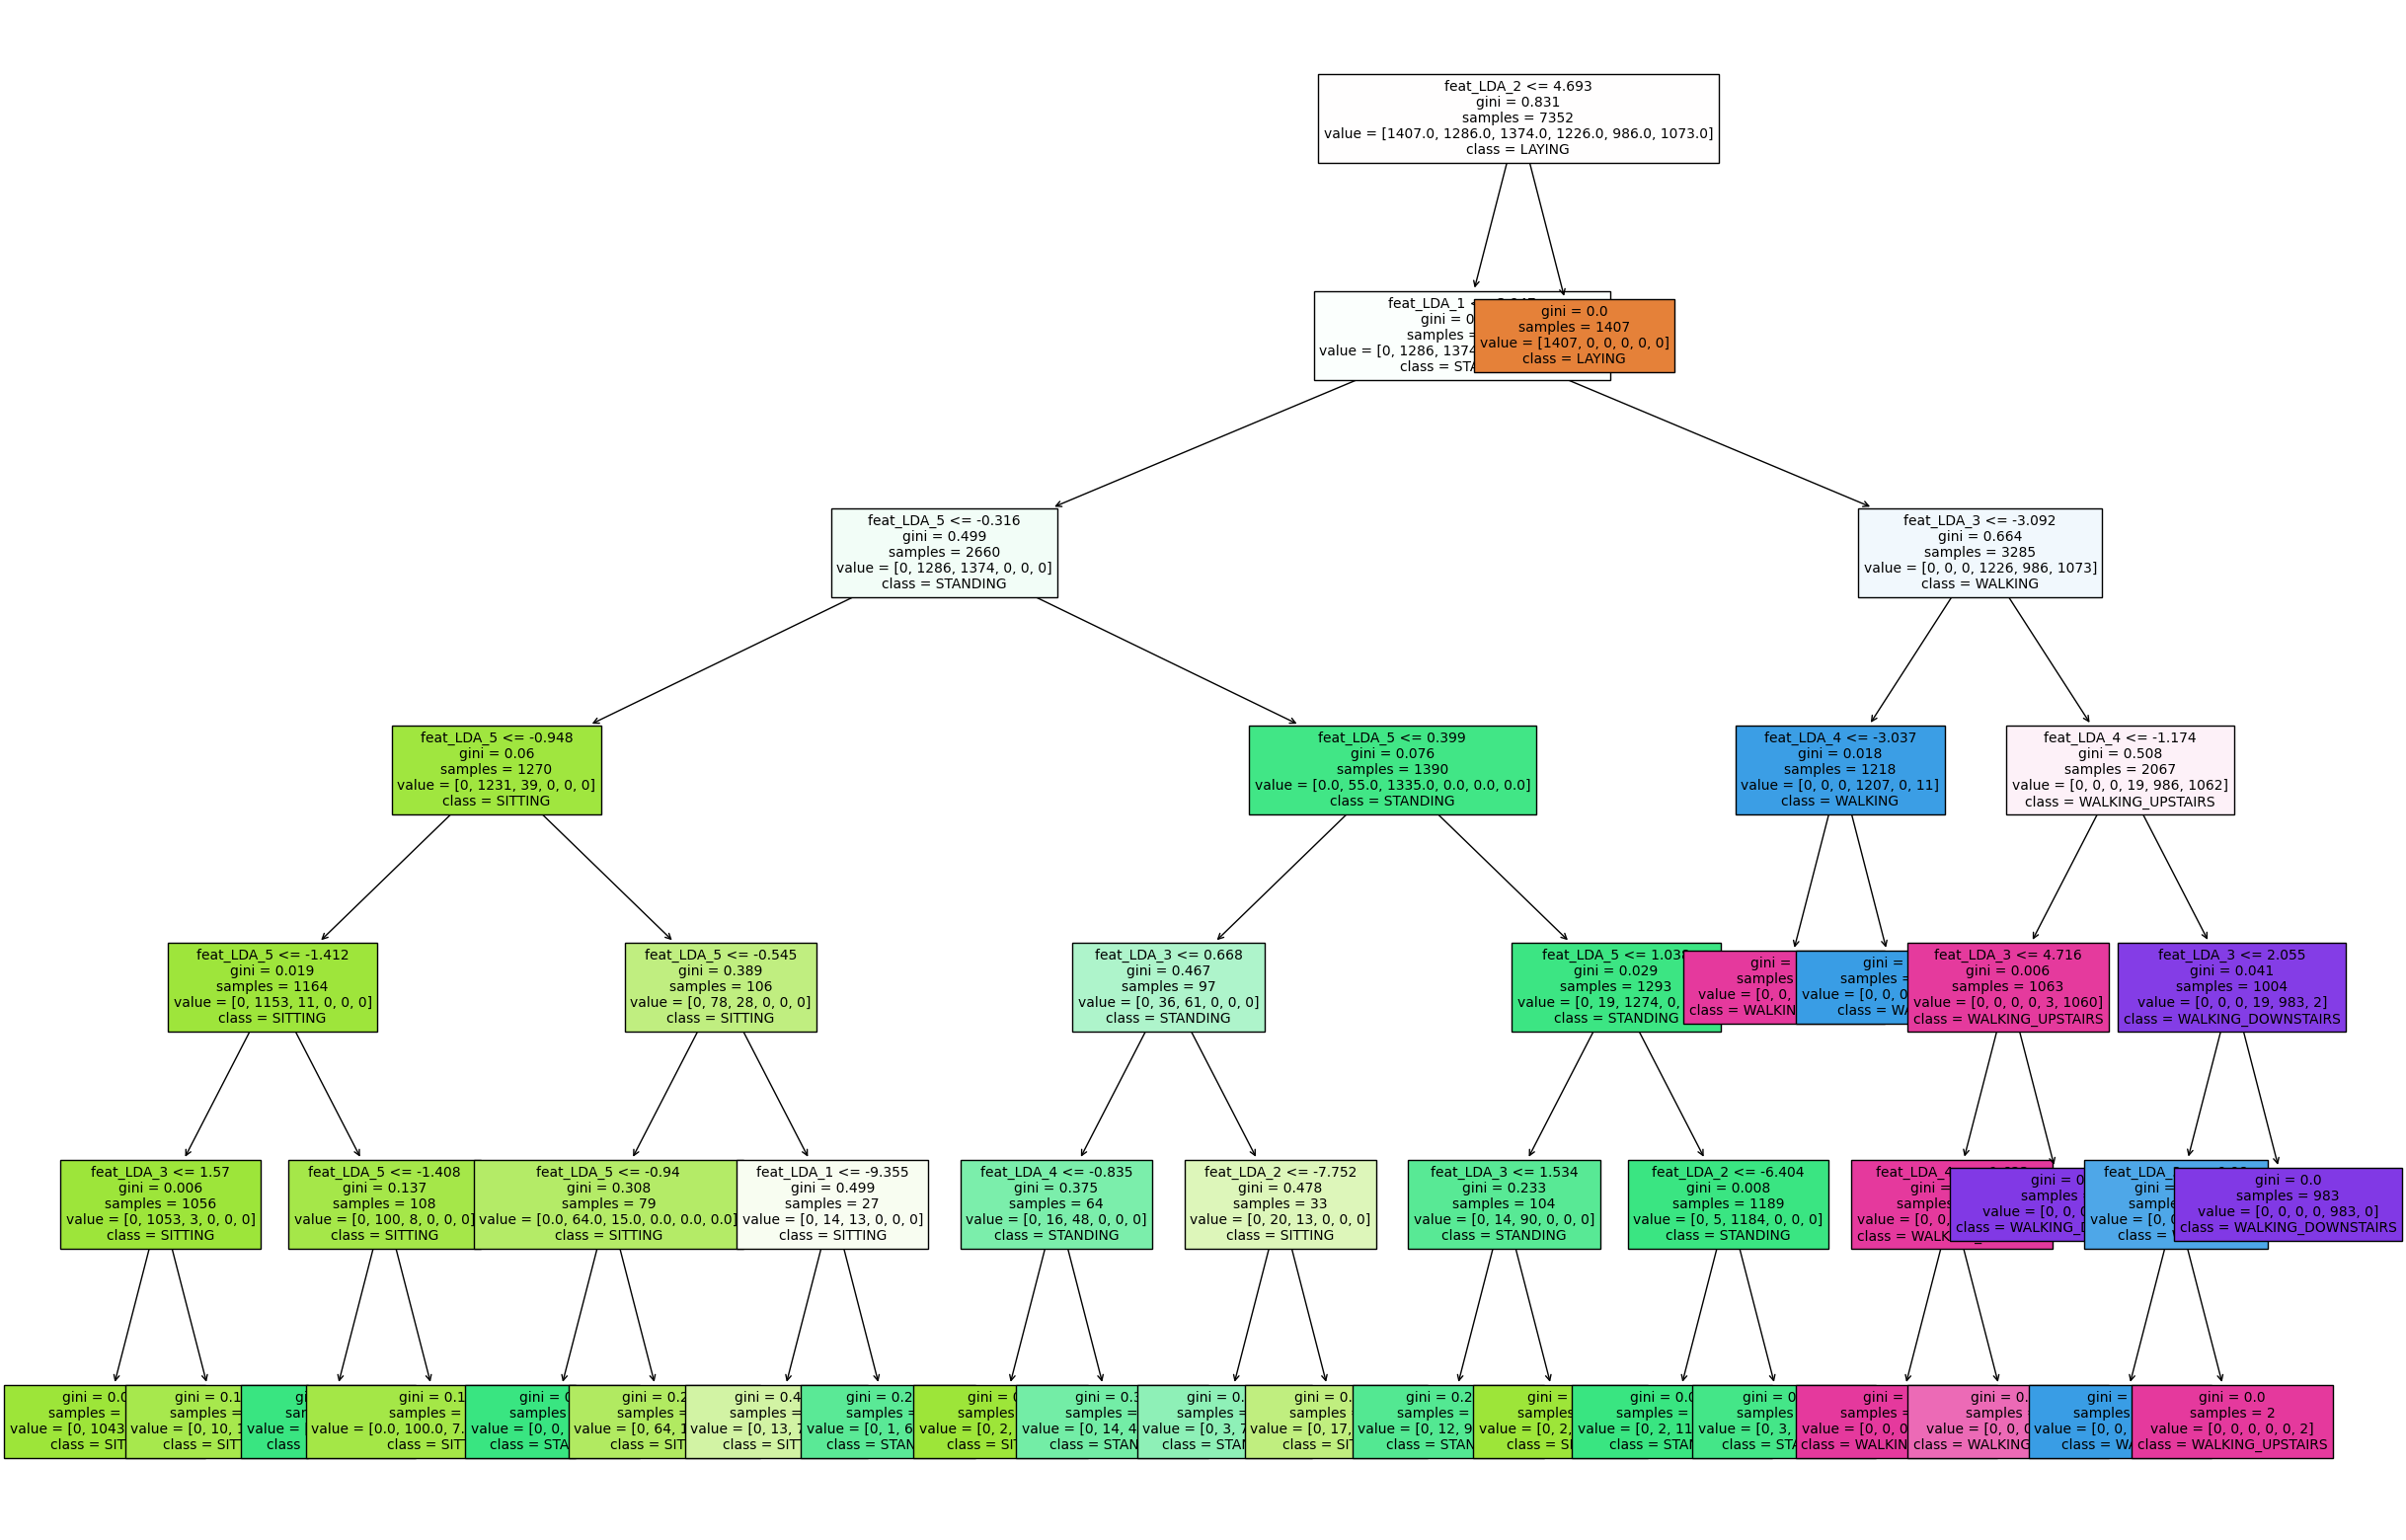

In [27]:
fig = plt.figure(figsize=(30,20))

model_DT = DecisionTreeClassifier(max_depth=6, random_state=42)
model_DT.fit(X_lda_train, Y_train)

_ = tree.plot_tree(model_DT, feature_names=[f"feat_LDA_{i}" for i in range(1, 6)], class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], filled=True, fontsize=10)

# Support Vector Machine (SVC)

In [28]:
model_SVM = SVC()

scores = cross_val_score(model_SVM, X_lda_train, Y_train, cv=cv, scoring="f1_macro")
print(scores)
print(f"f1={scores.mean().round(3)}+-{scores.std().round(3)}")

[0.98746424 0.99247259 0.98432914 0.98933477 0.98423148]
f1=0.988+-0.003


## Decision Boundary Visualization

Index(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'],
      dtype='object')
X_v2_shape=(7352, 2)	Y_v2_shape=(7352,)


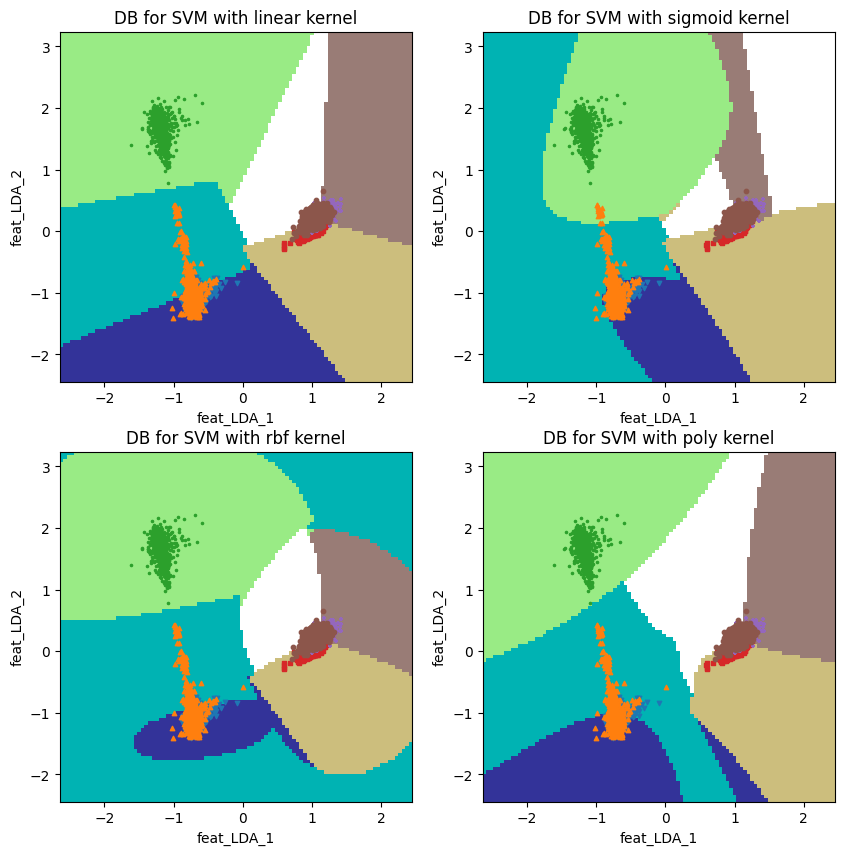

In [27]:
# depending on the transformation kernel

df_features_v2 = df_LDA_train[["feat_LDA_1", "feat_LDA_2"]]
df_labels_v2 = df_LDA_train["Activity"]

X_v2 = df_features_v2.to_numpy()
Y_v2, classes = pd.factorize(df_labels_v2)

scaler = StandardScaler()
scaler.fit(X_v2)
X_norm_v2 = scaler.transform(X_v2)

print(classes)
print(f"X_v2_shape={X_v2.shape}\tY_v2_shape={Y_v2.shape}")

kernel_types = ['linear', 'sigmoid', 'rbf', 'poly']

fig, ax = plt.subplots(2, 2)
for counter, kernel_type in enumerate(kernel_types):

  i = counter // 2
  j = counter % 2

  model_SVM = SVC(kernel=kernel_type)
  model_SVM.fit(X_norm_v2, Y_v2)

  DecisionBoundaryDisplay.from_estimator(
    estimator=model_SVM,
    X=X_norm_v2,
    ax=ax[i, j],
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="feat_LDA_1",
    ylabel="feat_LDA_2",
    eps=1,
    cmap="terrain"
    )

  ax[i, j].set_title(f"DB for SVM with {kernel_type} kernel")

  markers = ["v", "^", ".", "s", "+", "o"]

  for k in range(0, 6):
    ax[i, j].scatter(X_norm_v2[:, 0][Y_v2 == k], X_norm_v2[:, 1][Y_v2 == k], marker=markers[k], s=10)

fig.set_size_inches(10, 10)

Index(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'],
      dtype='object')
X_v2_shape=(7352, 2)	Y_v2_shape=(7352,)


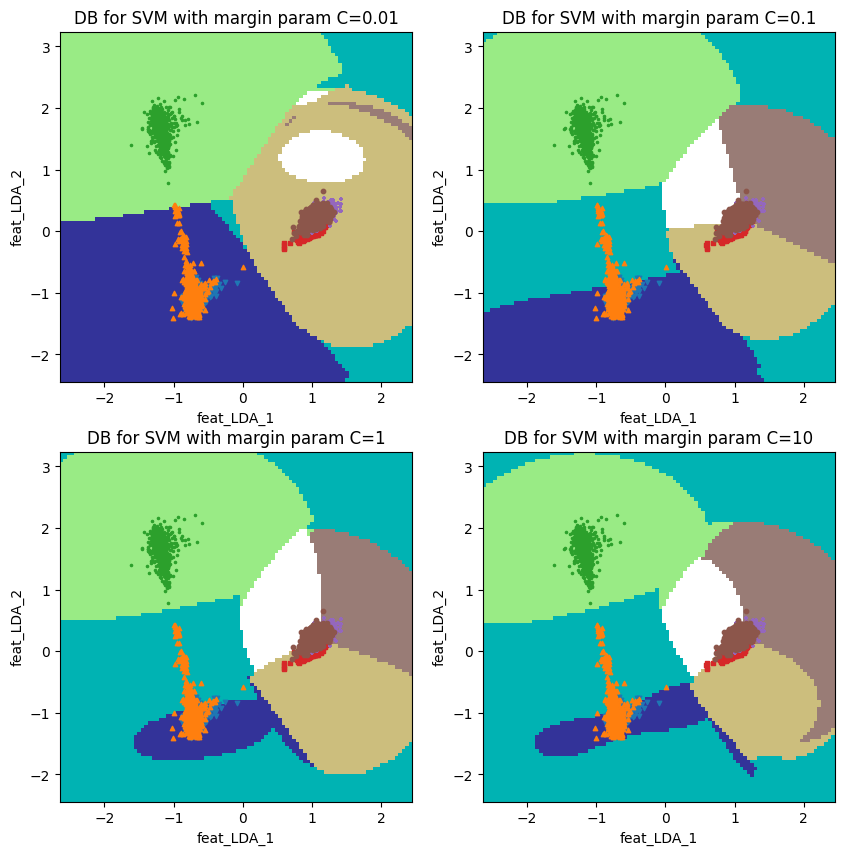

In [29]:
# depending on parameter C

df_features_v2 = df_LDA_train[["feat_LDA_1", "feat_LDA_2"]]
df_labels_v2 = df_LDA_train["Activity"]

X_v2 = df_features_v2.to_numpy()
Y_v2, classes = pd.factorize(df_labels_v2)

scaler = StandardScaler()
scaler.fit(X_v2)
X_norm_v2 = scaler.transform(X_v2)

print(classes)
print(f"X_v2_shape={X_v2.shape}\tY_v2_shape={Y_v2.shape}")

C_values = [0.01, 0.1, 1, 10]

fig, ax = plt.subplots(2, 2)
for counter, C in enumerate(C_values):

  i = counter // 2
  j = counter % 2

  model_SVM = SVC(kernel="rbf", C=C)
  model_SVM.fit(X_norm_v2, Y_v2)

  DecisionBoundaryDisplay.from_estimator(
    estimator=model_SVM,
    X=X_norm_v2,
    ax=ax[i, j],
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="feat_LDA_1",
    ylabel="feat_LDA_2",
    eps=1,
    cmap="terrain"
    )

  ax[i, j].set_title(f"DB for SVM with margin param C={C}")

  markers = ["v", "^", ".", "s", "+", "o"]

  for k in range(0, 6):
    ax[i, j].scatter(X_norm_v2[:, 0][Y_v2 == k], X_norm_v2[:, 1][Y_v2 == k], marker=markers[k], s=10)

fig.set_size_inches(10, 10)

Index(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'],
      dtype='object')
X_v2_shape=(7352, 2)	Y_v2_shape=(7352,)


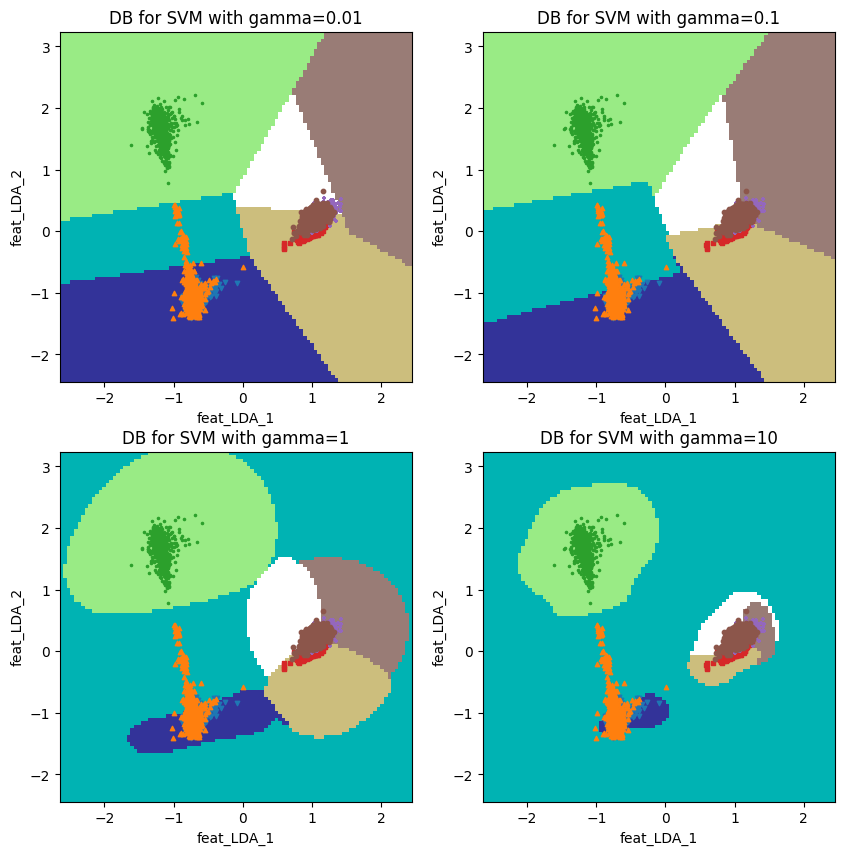

In [30]:
# based on parameter gamma

df_features_v2 = df_LDA_train[["feat_LDA_1", "feat_LDA_2"]]
df_labels_v2 = df_LDA_train["Activity"]

X_v2 = df_features_v2.to_numpy()
Y_v2, classes = pd.factorize(df_labels_v2)

scaler = StandardScaler()
scaler.fit(X_v2)
X_norm_v2 = scaler.transform(X_v2)

print(classes)
print(f"X_v2_shape={X_v2.shape}\tY_v2_shape={Y_v2.shape}")

gamma_values = [0.01, 0.1, 1, 10]

fig, ax = plt.subplots(2, 2)
for counter, gamma in enumerate(gamma_values):

  i = counter // 2
  j = counter % 2

  model_SVM = SVC(kernel="rbf", C=1, gamma=gamma)
  model_SVM.fit(X_norm_v2, Y_v2)

  DecisionBoundaryDisplay.from_estimator(
    estimator=model_SVM,
    X=X_norm_v2,
    ax=ax[i, j],
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="feat_LDA_1",
    ylabel="feat_LDA_2",
    eps=1,
    cmap="terrain"
    )

  ax[i, j].set_title(f"DB for SVM with gamma={gamma}")

  markers = ["v", "^", ".", "s", "+", "o"]


  for k in range(0, 6):
    ax[i, j].scatter(X_norm_v2[:, 0][Y_v2 == k], X_norm_v2[:, 1][Y_v2 == k], marker=markers[k], s=10)

fig.set_size_inches(10, 10)

In [29]:
# Strojenie parametrów dla SVM: rodzaj jądra przekształcenia, C oraz gamma

clf = GridSearchCV(
    estimator=SVC(),
    param_grid={
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'sigmoid', 'rbf', 'poly'],
        'gamma': [0.01, 0.1, 1]
    },
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="f1_macro"
)
clf.fit(X_lda_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'sigmoid', 'rbf', 'poly']},
             scoring='f1_macro')

In [30]:
print(clf.cv_results_["mean_test_score"])

print(clf.cv_results_["params"][np.argmax(clf.cv_results_["mean_test_score"])])

[0.9875643  0.98047824 0.98756686 0.98693397 0.9875643  0.18218628
 0.98693926 0.98740081 0.9875643  0.17784398 0.94099536 0.98627525
 0.98731312 0.97098597 0.98769109 0.98756343 0.98731312 0.1903199
 0.98718666 0.98639948 0.98731312 0.17875727 0.97565892 0.98552181
 0.98756385 0.94343444 0.98731339 0.98790293 0.98756385 0.21870037
 0.98695473 0.9867765  0.98756385 0.17955833 0.97486115 0.98464227]
{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}


In [31]:
model_SVM = SVC(kernel='poly', C=10, gamma=0.01)

model_SVM.fit(X_lda_train, Y_train)

SVC(C=10, gamma=0.01, kernel='poly')

In [32]:
model_SVM.support_vectors_.shape

(275, 5)

# Linear Discriminant Analysis

In [34]:
model_LDA = LinearDiscriminantAnalysis()

scores = cross_val_score(model_LDA, X_lda_train, Y_train, cv=cv, scoring="f1_macro")
print(f"f1={scores.mean().round(3)}+-{scores.std().round(3)}")

f1=0.987+-0.003


# Gradient Boosting Classifier

In [36]:
n_estimator_values = [3, 5, 10, 15, 20, 25, 30]

clf = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid={
        "n_estimators": n_estimator_values,
        "max_depth": range(1, 3)
    },
    cv=cv,
    scoring="f1_macro"
)
clf.fit(X_lda_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': range(1, 3),
                         'n_estimators': [3, 5, 10, 15, 20, 25, 30]},
             scoring='f1_macro')

In [37]:
print(np.max(clf.cv_results_["mean_test_score"]).round(3))
print(clf.cv_results_["params"][np.argmax(clf.cv_results_["mean_test_score"])])

0.985
{'max_depth': 2, 'n_estimators': 25}


In [38]:
n_estimator_values = [5, 15, 25, 30]

clf = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid={
        "n_estimators": n_estimator_values,
        "max_depth": range(1, 5)
    },
    cv=cv,
    scoring="f1_macro"
)
clf.fit(X_lda_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': range(1, 5),
                         'n_estimators': [5, 15, 25, 30]},
             scoring='f1_macro')

In [39]:
print(np.max(clf.cv_results_["mean_test_score"]).round(3))
print(clf.cv_results_["params"][np.argmax(clf.cv_results_["mean_test_score"])])

0.986
{'max_depth': 4, 'n_estimators': 25}


# Model Comparison

In [41]:
f1_values_mean = []
f1_values_error = []
model_names = []

for model_name, model in [("LogReg", LogisticRegression(max_iter=1000)), ("KNN", KNeighborsClassifier(n_neighbors=8, metric='euclidean')), ("DT", DecisionTreeClassifier(max_depth=6, random_state=42)),
                          ("SVC", SVC(kernel="poly", C=10, gamma=0.01)), ("NB", GaussianNB()), ("LDA", LinearDiscriminantAnalysis()), ("GBC", GradientBoostingClassifier(n_estimators=25, max_depth=4, random_state=42))]:
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_lda_train, Y_train, cv=cv, scoring="f1_macro")
    print(f"{model_name} f1={scores.mean().round(3)}+-{scores.std().round(3)}")

    f1_values_mean.append(scores.mean())
    f1_values_error.append(scores.std() * 1.96 / np.sqrt(20))
    model_names.append(model_name)

LogReg f1=0.988+-0.003
KNN f1=0.988+-0.002
DT f1=0.985+-0.003
SVC f1=0.988+-0.003
NB f1=0.987+-0.002
LDA f1=0.987+-0.003
GBC f1=0.986+-0.003


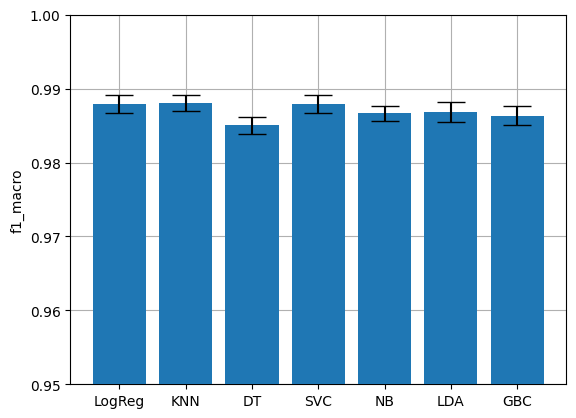

In [48]:
fig, ax = plt.subplots()
ax.bar(model_names, height=f1_values_mean, yerr=f1_values_error, capsize=10, zorder=3)
ax.set_ylim(0.95, 1)
ax.set_ylabel("f1_macro")
ax.grid(zorder=0)

# Confusion Matrix for KNN

In [50]:
X_lda_test.shape

(2947, 5)

In [51]:
Y_test.shape

(2947,)

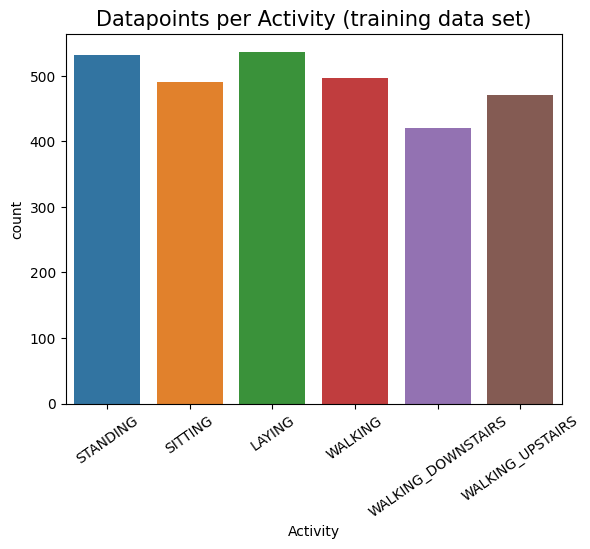

In [61]:
plt.title('Datapoints per Activity (training data set)', fontsize=15)
sns.countplot(x=df_HAR_test['Activity'], hue=df_HAR_test['Activity'])
plt.xticks(rotation=35)
plt.show()

In [67]:
df_HAR_test['Activity'].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

## Y-value Mapping

In [80]:
activity_names = np.unique(Y_train)
activity_to_id = dict()
for i, activity in enumerate(activity_names):
  activity_to_id[activity] = i
print(activity_to_id)

Y_train_after_mapping = [activity_to_id[val] for val in Y_train]
Y_test_after_mapping = [activity_to_id[val] for val in Y_test]

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  21 511   0   0   0]
 [  0   0   0 491   0   5]
 [  0   0   0   1 412   7]
 [  0   0   0  10   0 461]]


[Text(0, 0.5, 'LAYING'),
 Text(0, 1.5, 'SITTING'),
 Text(0, 2.5, 'STANDING'),
 Text(0, 3.5, 'WALKING'),
 Text(0, 4.5, 'WALKING_DOWNSTAIRS'),
 Text(0, 5.5, 'WALKING_UPSTAIRS')]

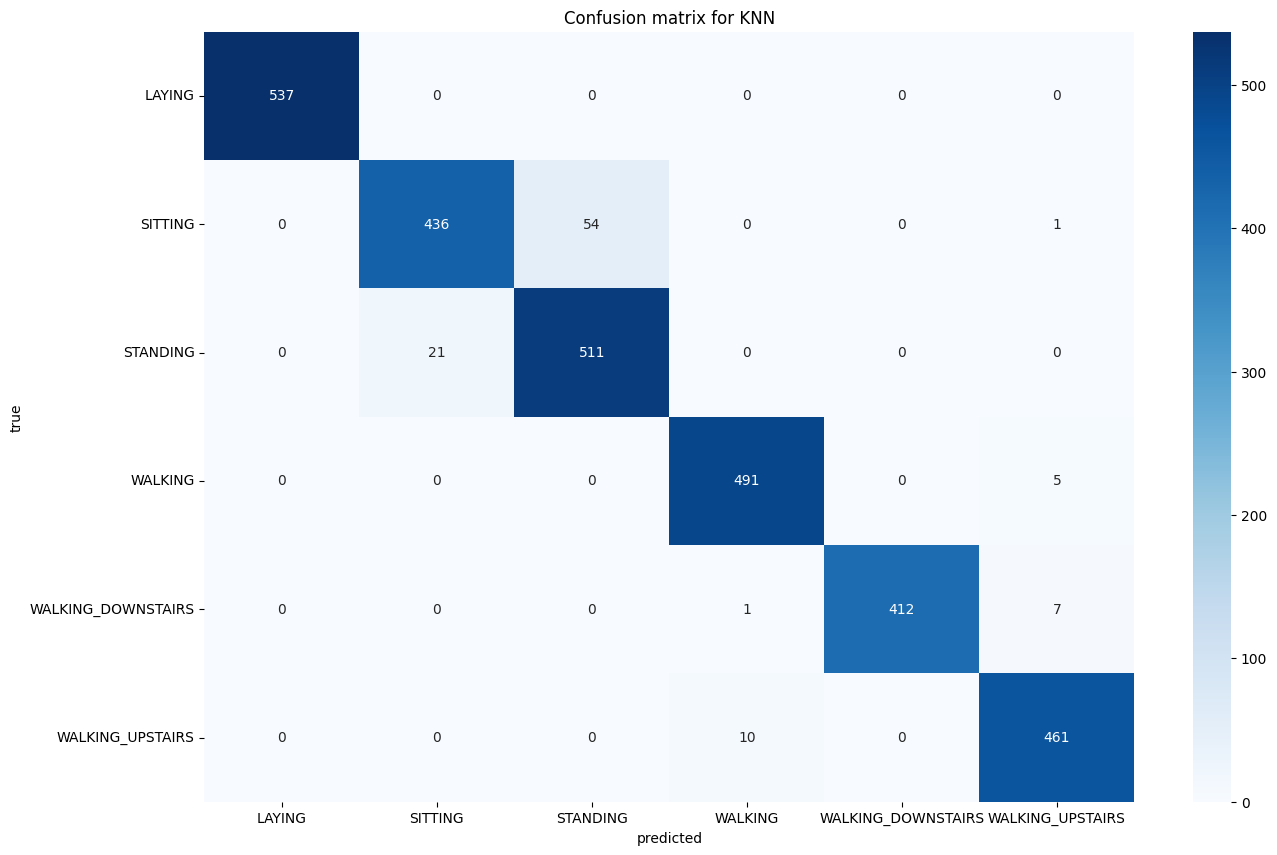

In [81]:
model_SVM = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
model_SVM.fit(X_lda_train, Y_train_after_mapping)

Y_pred = model_SVM.predict(X_lda_test)

conf_matrix = confusion_matrix(Y_test_after_mapping, Y_pred)
print(conf_matrix)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion matrix for KNN")
ax.set_xlabel("predicted")
ax.set_ylabel("true")
ax.xaxis.set_ticklabels(activity_names)
ax.yaxis.set_ticklabels(activity_names, rotation=0)

# Confusion Matrix for SVC

[[537   0   0   0   0   0]
 [  0 433  58   0   0   0]
 [  0  20 512   0   0   0]
 [  0   0   1 489   0   6]
 [  0   0   0   1 405  14]
 [  0   0   0  10   0 461]]


[Text(0, 0.5, 'LAYING'),
 Text(0, 1.5, 'SITTING'),
 Text(0, 2.5, 'STANDING'),
 Text(0, 3.5, 'WALKING'),
 Text(0, 4.5, 'WALKING_DOWNSTAIRS'),
 Text(0, 5.5, 'WALKING_UPSTAIRS')]

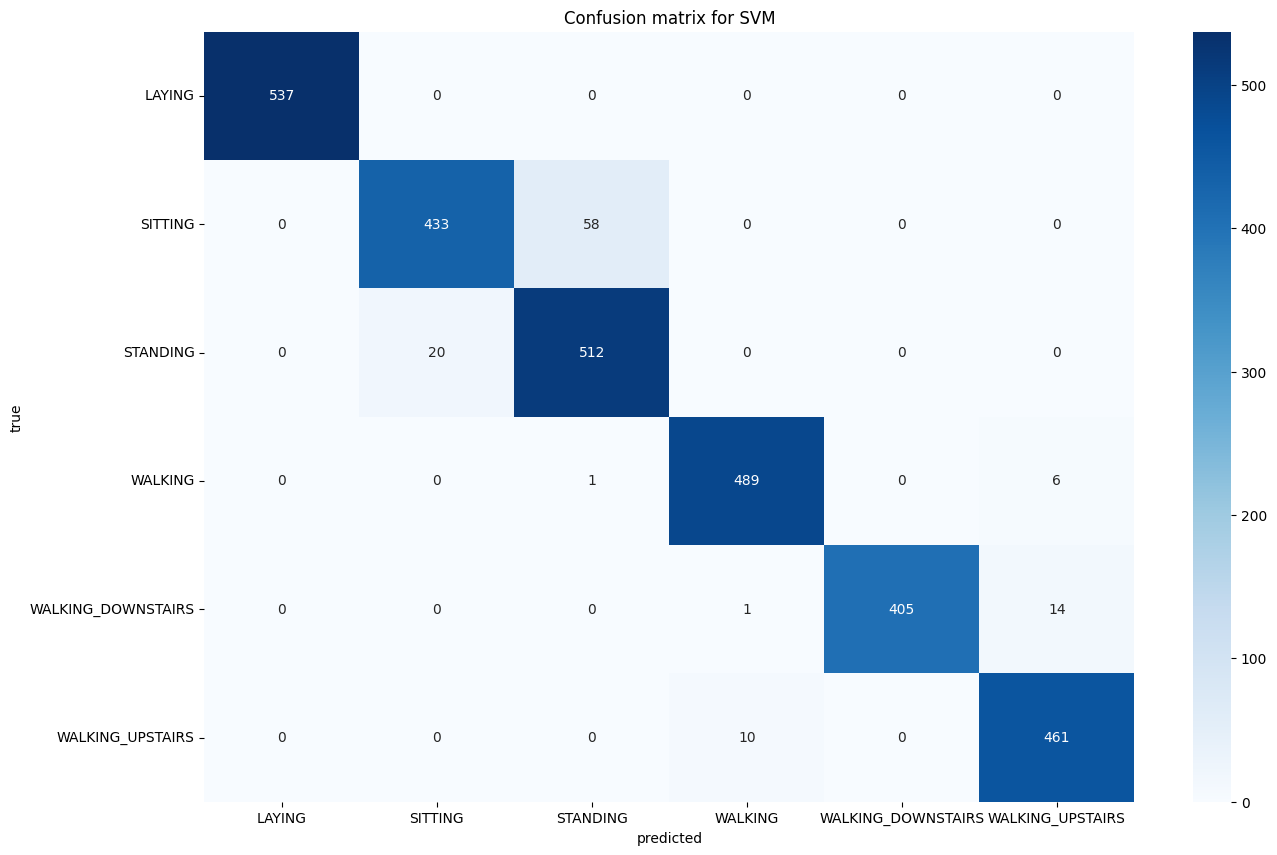

In [84]:
model_SVM = SVC(kernel="poly", C=10, gamma=0.01)
model_SVM.fit(X_lda_train, Y_train_after_mapping)

Y_pred = model_SVM.predict(X_lda_test)

conf_matrix = confusion_matrix(Y_test_after_mapping, Y_pred)
print(conf_matrix)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion matrix for SVM")
ax.set_xlabel("predicted")
ax.set_ylabel("true")
ax.xaxis.set_ticklabels(activity_names)
ax.yaxis.set_ticklabels(activity_names, rotation=0)

# Importance of Features using DecissionTreeClassifier

In [85]:
model_DT = DecisionTreeClassifier(max_depth=6, random_state=42)
model_DT.fit(X_lda_train, Y_train)

print(model_DT.feature_importances_.shape)
print(np.sum(model_DT.feature_importances_))

(5,)
1.0


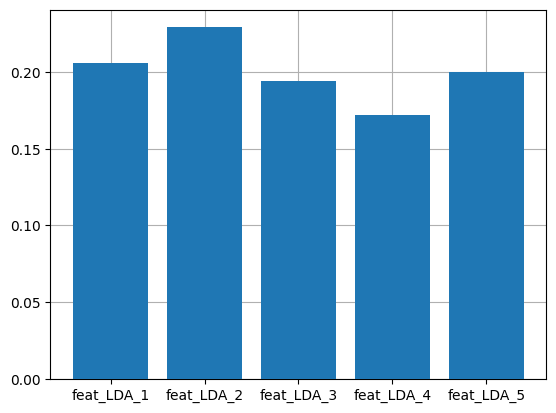

In [91]:
fig, ax = plt.subplots()
ax.bar(x=df_LDA_train.columns[:-1], height=model_DT.feature_importances_, zorder=3)
#ax.set_yscale("log")
ax.tick_params(axis='x', labelrotation=0)
ax.grid(zorder=0)

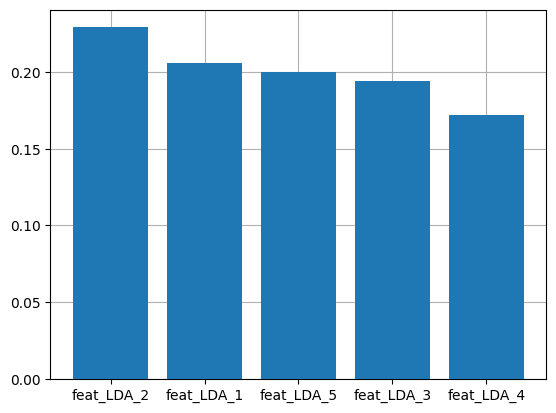

In [94]:
labels = df_LDA_train.columns[:-1]
importances = model_DT.feature_importances_
labels_with_importances = list(zip(labels, importances))
labels_with_importances = sorted(labels_with_importances, key=lambda tup: tup[1], reverse=True)
labels_sorted = [el[0] for el in labels_with_importances]
importances_sorted = [el[1] for el in labels_with_importances]

fig, ax = plt.subplots()
ax.bar(x=labels_sorted, height=importances_sorted, zorder=3)
ax.tick_params(axis="x", labelrotation=0)
ax.grid(zorder=0)

# Feature Selection

In [98]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

feature_names = list(df_LDA_train.columns[:-1].values)

f1_scores =[]

while(1):

  df_features = df_LDA_train[feature_names]
  df_labels =  df_LDA_train["Activity"]

  X = df_features.to_numpy()
  Y = df_labels.to_numpy()

  model_DT = DecisionTreeClassifier(max_depth=6, random_state=42)
  model_DT.fit(X, Y)

  scores = cross_val_score(model_DT, X, Y, cv=cv, scoring="f1_macro")
  print(f"no_best_featrues={len(feature_names)}\tF1={scores.mean().round(3)}+-{scores.std().round(3)}")
  f1_scores.append(scores.mean().round(3))

  if X.shape[1] == 1:
    break

  importances = model_DT.feature_importances_
  id_feat_to_remove = np.argmin(importances)
  print(f"removed_feature: {feature_names[ id_feat_to_remove]}")
  print("------------------")
  feature_names.remove(feature_names[ id_feat_to_remove])

print(f"best feature: {feature_names[0]}")

no_best_featrues=5	F1=0.985+-0.003
removed_feature: feat_LDA_4
------------------
no_best_featrues=4	F1=0.978+-0.005
removed_feature: feat_LDA_5
------------------
no_best_featrues=3	F1=0.867+-0.005
removed_feature: feat_LDA_1
------------------
no_best_featrues=2	F1=0.853+-0.007
removed_feature: feat_LDA_3
------------------
no_best_featrues=1	F1=0.642+-0.007
best feature: feat_LDA_2


In [99]:
f1_scores

[0.985, 0.978, 0.867, 0.853, 0.642]

In [106]:
no_best_features = list(range(5, 0, -1))
no_best_features

[5, 4, 3, 2, 1]

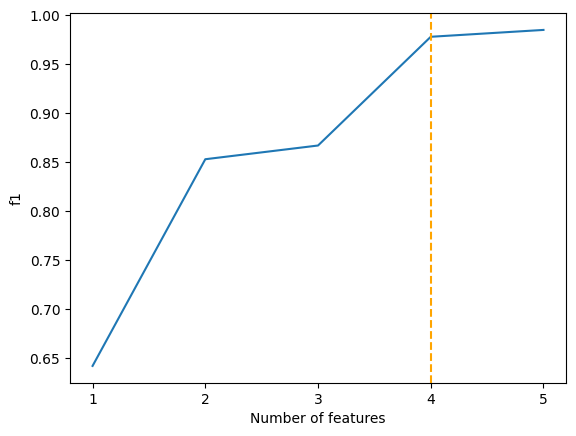

In [113]:
plt.plot(no_best_features, f1_scores)
plt.xlabel('Number of features')
plt.ylabel('f1')
plt.xticks(np.arange(1, 6, step=1))
plt.axvline(x=4, color='orange', linestyle='--')

# Decision Boundary for KNN

In [128]:
df_features_v2 = df_LDA_train[["feat_LDA_1", "feat_LDA_2"]]
df_labels_v2 = df_LDA_train["Activity"]

X_v2 = df_features_v2.to_numpy()
Y_v2, classes = pd.factorize(df_labels_v2)

print(classes)
print(f"X_v2_shape={X_v2.shape}\tY_v2_shape={Y_v2.shape}")

Index(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'],
      dtype='object')
X_v2_shape=(7352, 2)	Y_v2_shape=(7352,)


In [129]:
X_v2

array([[-10.1313034 ,  -8.60055544],
       [ -9.77495009,  -6.96730003],
       [ -9.76744618,  -7.14570682],
       ...,
       [ 14.36354522,   0.96591006],
       [ 14.59277896,   1.90517082],
       [ 15.56400978,   2.15495054]])

In [130]:
Y_v2

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [131]:
labels

Index(['feat_LDA_1', 'feat_LDA_2', 'feat_LDA_3', 'feat_LDA_4', 'feat_LDA_5'], dtype='object')

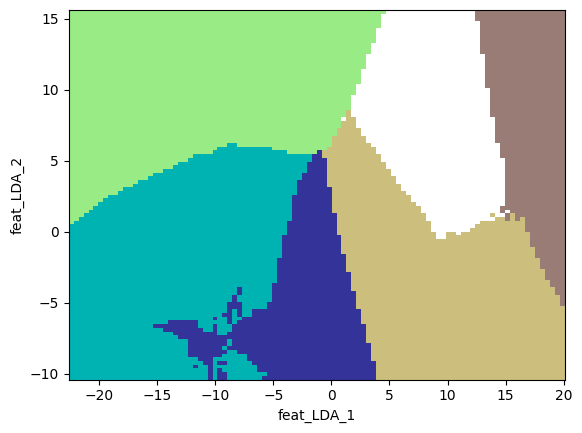

In [133]:
model_KNN = KNeighborsClassifier(n_neighbors=8, metric="euclidean")
model_KNN.fit(X_v2, Y_v2)

fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
  estimator=model_KNN,
  X=X_v2,
  ax=ax,
  response_method="predict",
  plot_method="pcolormesh",
  shading="auto",
  xlabel="feat_LDA_1",
  ylabel="feat_LDA_2",
  eps=1,
  cmap="terrain"
  )

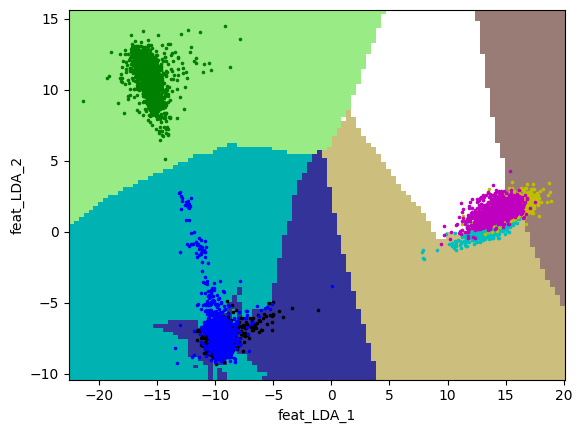

In [134]:
model_KNN = KNeighborsClassifier(n_neighbors=8, metric="euclidean")
model_KNN.fit(X_v2, Y_v2)

fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
  estimator=model_KNN,
  X=X_v2,
  ax=ax,
  response_method="predict",
  plot_method="pcolormesh",
  shading="auto",
  xlabel="feat_LDA_1",
  ylabel="feat_LDA_2",
  eps=1,
  cmap="terrain"
  )


colors = ['k','b','g','c','y','m']

for k in range(0, 6):
  ax.scatter(X_v2[:, 0][Y_v2 == k], X_v2[:, 1][Y_v2 == k], marker='.', color=colors[k], s=10)